In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data input
main_data = pd.read_csv("./data.csv",encoding = "ISO-8859-1")
main_data = main_data.drop("Unnamed: 0", axis=1)

In [3]:
# printing the header da
main_data.head(10) 

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [4]:
# Size of the data
print("data size: " + str(main_data.shape))
print('Jumlah kolom: '+str(len(main_data.columns)))
print("Jumlah baris: " + str(len(main_data.index)))

data size: (50, 13)
Jumlah kolom: 13
Jumlah baris: 50


In [5]:
print(main_data.columns)

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')


Hasil analisa awal kita mendapatkan bahwa data kita memiliki 50 baris dan 14 kolom, yang dimana kolomnya sudah kita print diatas yaitu,
1. Unnamed, semacam unique id untuk setiap lagu
2. Track.name, judul lagu
3. Artist.name, nama artis
4. Genre, genre dari lagu tersebut
5. Beats.Per.Minute, tempo dari lagu tsb dalam BPM
6. Energy, sebuah skala numerik seberapa enerjik lagu tersebut
7. Danceability, sebuah skala numerik seberapa bisa di tarikan lagu tsb
8. Loudness.dB, kekencangan lagu tsb dalam skala desibel
9. Liveness, sebuah skala numerik seberapa lively lagu tsb
10. Valence, sebuah skala numerik seberapa positif lagu tsb
11. Acousticness, sebuah skala numerik seberapa akustik lagu tsb
12. Speechiness, sebuah skala numerik seberapa vokal lagu tsb
13. Popularity, seberapa populer lagu tsb
14. length, panjang lagu tsb

# Statistical Analysis

In [6]:
# view statistical data for each column
print(main_data.describe())

       Beats.Per.Minute     Energy  Danceability  Loudness..dB..   Liveness  \
count         50.000000  50.000000      50.00000       50.000000  50.000000   
mean         120.060000  64.060000      71.38000       -5.660000  14.660000   
std           30.898392  14.231913      11.92988        2.056448  11.118306   
min           85.000000  32.000000      29.00000      -11.000000   5.000000   
25%           96.000000  55.250000      67.00000       -6.750000   8.000000   
50%          104.500000  66.500000      73.50000       -6.000000  11.000000   
75%          137.500000  74.750000      79.75000       -4.000000  15.750000   
max          190.000000  88.000000      90.00000       -2.000000  58.000000   

        Valence.     Length.  Acousticness..  Speechiness.  Popularity  
count  50.000000   50.000000       50.000000     50.000000   50.000000  
mean   54.600000  200.960000       22.160000     12.480000   87.500000  
std    22.336024   39.143879       18.995553     11.161596    4.49148

/Users/jonathanfilbert/Documents/sistem/Env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b2f3bd0>,
      dtype=object)

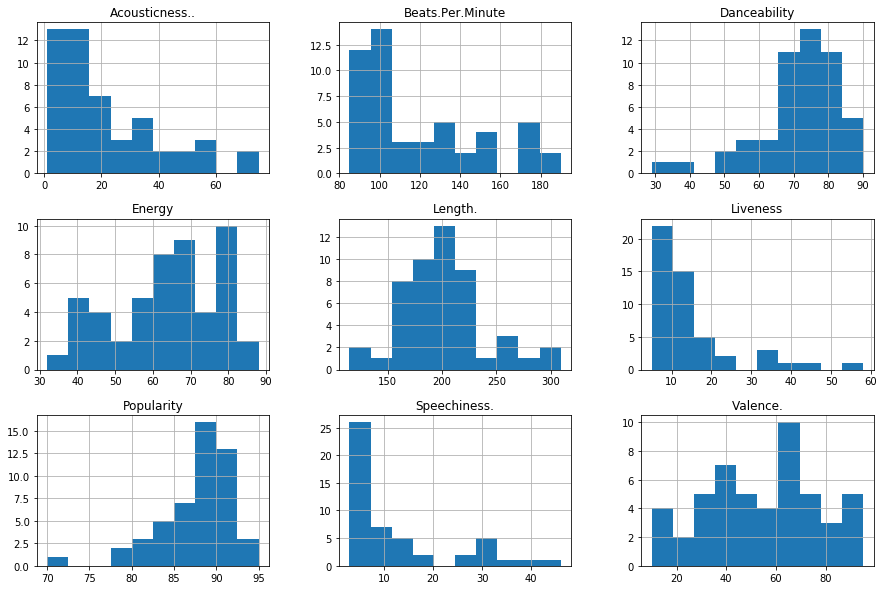

In [7]:
# Printing the histogram
dropped_data = main_data.drop(['Loudness..dB..'],axis=1)
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
dropped_data.hist(ax=ax)

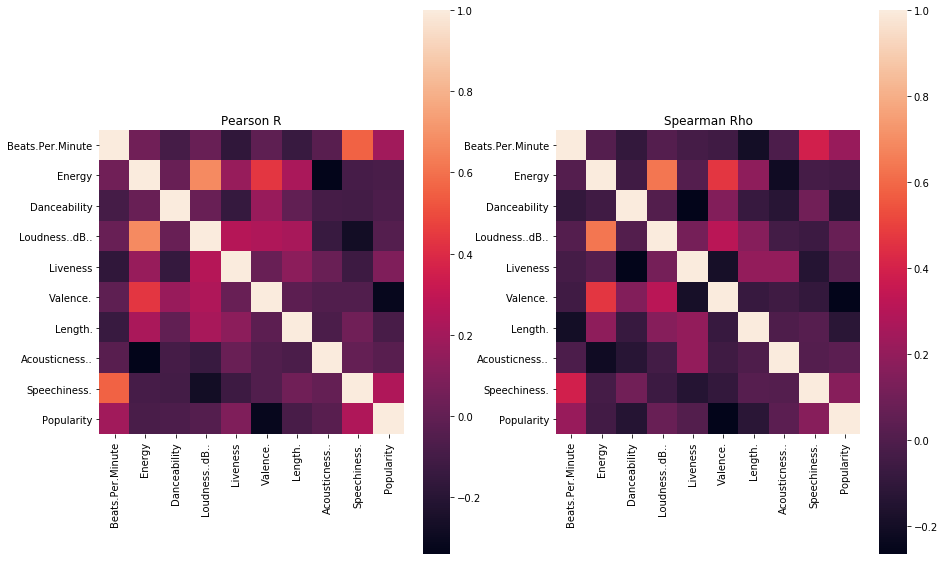

In [8]:
# finding the correlation between the columns using Pearson R (not using Z value)
f,ax = plt.subplots(1,2,figsize=(15,10))
sns.heatmap(main_data.corr(),square=True,ax=ax[0])

# the heatmap of the above table, using Spearman Rho (using Z value)
sns.heatmap(main_data.corr(method="spearman"),square=True,ax=ax[1])
ax[0].set(title="Pearson R")
ax[1].set(title="Spearman Rho")

plt.show()

# Conclusion
1. Speechiness has a strong correlation with bpm
2. loudness db has a strong correlation with energy
.....

Why the 2 heatmaps differ?
The left use Pearson's R and the right one uses Spearman Rho, the reason they differ is that Spearman Rho uses a standard value. it has been proven that by using 2 different methods to find the correlation, the correlation mentioned above are correct.

In [9]:
# Creating the correlation table using spearman's rank
main_data.corr(method="spearman")

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Beats.Per.Minute,1.000000,0.012491,-0.092086,0.013771,-0.032899,-0.048304,-0.198159,-0.010390,0.391641,0.217002
Energy,0.012491,1.000000,-0.048890,0.635464,0.013355,0.466911,0.188935,-0.211494,-0.034860,-0.044186
Danceability,-0.092086,-0.048890,1.000000,0.009268,-0.261500,0.154821,-0.078659,-0.127963,0.103832,-0.140960
Loudness..dB..,0.013771,0.635464,0.009268,1.000000,0.113606,0.317048,0.164729,-0.040145,-0.063160,0.072366
Liveness,-0.032899,0.013355,-0.261500,0.113606,1.000000,-0.186640,0.201778,0.203657,-0.136935,0.012037
Valence.,-0.048304,0.466911,0.154821,0.317048,-0.186640,1.000000,-0.081093,-0.053447,-0.094742,-0.264501
Length.,-0.198159,0.188935,-0.078659,0.164729,0.201778,-0.081093,1.000000,-0.004734,0.020217,-0.121973
Acousticness..,-0.010390,-0.211494,-0.127963,-0.040145,0.203657,-0.053447,-0.004734,1.000000,0.016973,0.035626
Speechiness.,0.391641,-0.034860,0.103832,-0.063160,-0.136935,-0.094742,0.020217,0.016973,1.000000,0.165431
Popularity,0.217002,-0.044186,-0.140960,0.072366,0.012037,-0.264501,-0.121973,0.035626,0.165431,1.000000


# Relationship between 10 top artists and 10 top genres

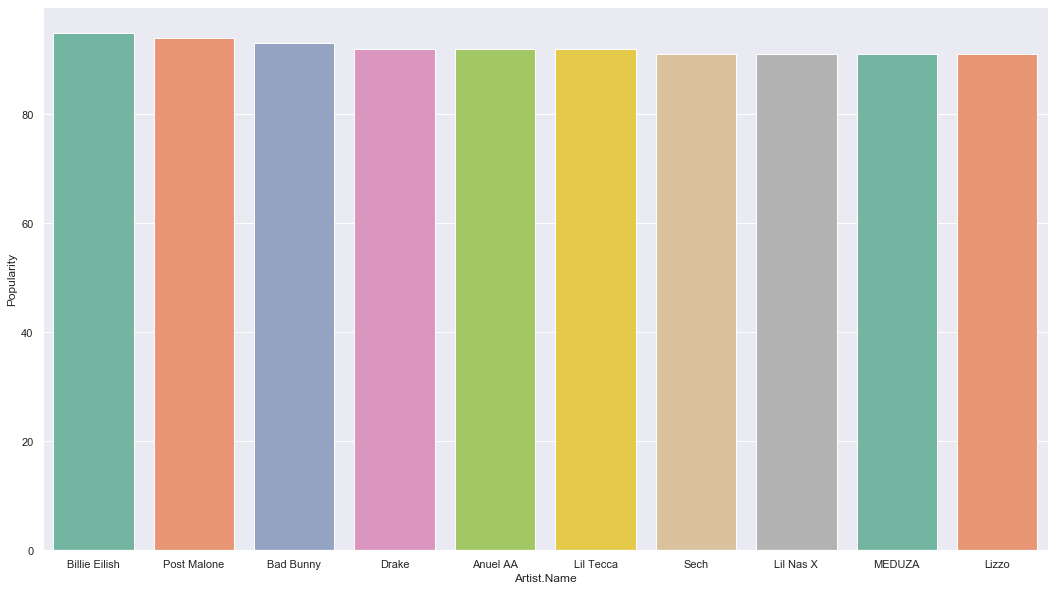

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
10,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
14,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
36,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91
21,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
20,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91
19,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91


In [10]:
# ranking and plotting the artist based on the popularity
sorted_data_by_popularity = main_data.sort_values(by="Popularity", ascending=False)[:10:1]
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(18,10))
sns.barplot(x = "Artist.Name",y="Popularity",data=sorted_data_by_popularity, palette="Set2")
plt.show()

# show the sorted by popularity table
sorted_data_by_popularity

In [11]:
# Ranking the genre based on how much are they contained in the dataset
print(main_data["Genre"].value_counts())

dance pop           8
pop                 7
latin               5
edm                 3
canadian hip hop    3
panamanian pop      2
dfw rap             2
reggaeton flow      2
canadian pop        2
country rap         2
reggaeton           2
electropop          2
brostep             2
escape room         1
trap music          1
atl hip hop         1
australian pop      1
pop house           1
r&b en espanol      1
big room            1
boy band            1
Name: Genre, dtype: int64


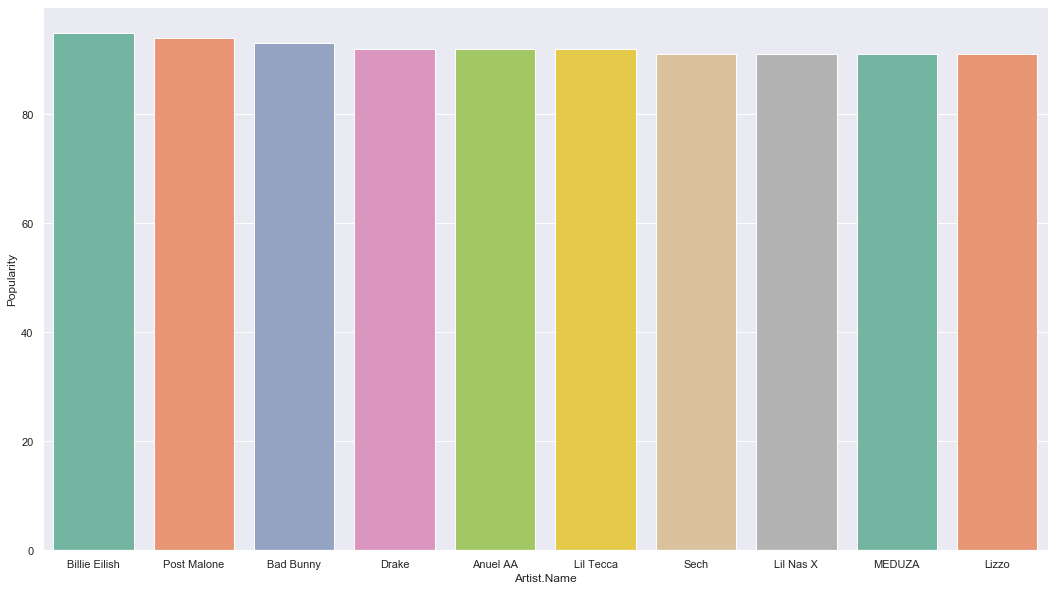

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
10,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
36,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91
46,Te Robaré,Nicky Jam,latin,176,75,67,-4,8,80,202,24,6,88
16,LA CANCIÓN,J Balvin,latin,176,65,75,-6,11,43,243,15,32,90
13,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87
19,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91
21,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
37,Antisocial (with Travis Scott),Ed Sheeran,pop,152,82,72,-5,36,91,162,13,5,87


In [12]:
# Finding the top genres based on bpm, accousticability, etc

# by bpm
sorted_data_by_bpm = main_data.sort_values(by="Beats.Per.Minute",ascending=False)[:10:]
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(18,10))
sns.barplot(x = "Artist.Name",y="Popularity",data=sorted_data_by_popularity, palette="Set2")
plt.show()
# Final
sorted_data_by_bpm


# Predicting the popular genres of 2020

In [13]:
sorted_by_popularity = main_data.sort_values("Popularity",ascending=False).reset_index()
sorted_by_popularity = sorted_by_popularity.drop("index",axis=1)
sorted_by_popularity

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
1,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
2,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
3,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
4,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
5,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
6,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91
7,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
8,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91
9,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91


In [14]:
# Finding the unique data and counting the occurences
sorted_by_popularity["Genre"].value_counts()

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
brostep             2
dfw rap             2
canadian pop        2
reggaeton flow      2
country rap         2
reggaeton           2
electropop          2
panamanian pop      2
escape room         1
trap music          1
atl hip hop         1
australian pop      1
boy band            1
pop house           1
r&b en espanol      1
big room            1
Name: Genre, dtype: int64

In [15]:
# Scraping the genres
genre_list = list(sorted_by_popularity["Genre"])
basic_genres = {"pop":0,"rap":0,"reggaeton":0,"hip hop":0}
for genres in genre_list:
    if("pop" in genres):
        basic_genres["pop"]+=1
    elif("rap" in genres):
        basic_genres["rap"]+=1
    elif("reggaeton" in genres):
        basic_genres["reggaeton"]+=1
    elif("hip hop" in genres):
        basic_genres["hip hop"]+=1
    else:
        if(genres not in basic_genres):
            basic_genres[genres]=1
        else:
            basic_genres[genres] +=1
        
print(basic_genres)

{'pop': 23, 'rap': 5, 'reggaeton': 4, 'hip hop': 4, 'escape room': 1, 'latin': 5, 'big room': 1, 'edm': 3, 'r&b en espanol': 1, 'brostep': 2, 'boy band': 1}


('pop', 'rap', 'reggaeton', 'hip hop', 'escape room', 'latin', 'big room', 'edm', 'r&b en espanol', 'brostep', 'boy band')
[23, 5, 4, 4, 1, 5, 1, 3, 1, 2, 1]


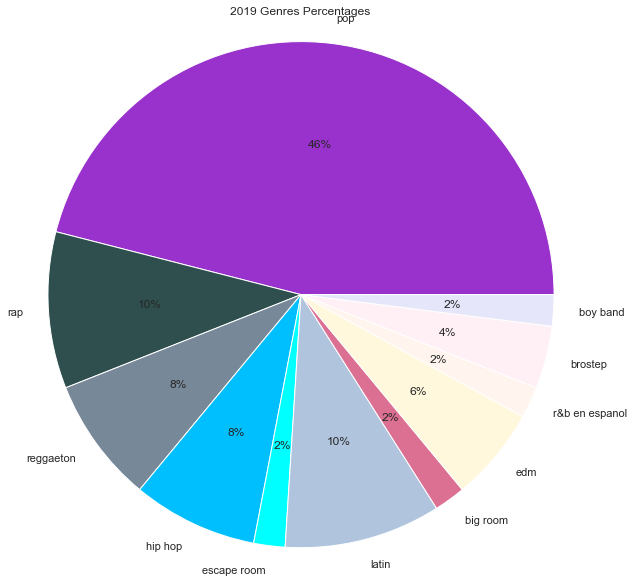

In [16]:
import random
import matplotlib.colors as mcolors
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 100)

# Making the pie charts
labels = tuple(basic_genres.keys())
basic_genres.keys()
print(labels)
size = list(basic_genres.values())
print(size)

f, ax = plt.subplots(figsize=(10,10))
ax.pie(size,labels=labels,autopct="%1.0f%%",colors=colors)
ax.axis("equal")
ax.set_title("2019 Genres Percentages")
plt.show()

# Conclusions

Since the available data is not big enough for us to conduct a machine learning process, hence I cleaned the data to display the most occured data from the chart. We can conclude that since the genre of Pop and its sub-genres appear the most, next year, pop and its subgenres will still dominate the chart.

# Relationship between the top genres and top artists

In [23]:
# Top artist
data_sorted_by_artist_frequency = main_data["Artist.Name"].value_counts()
data_sorted_by_artist_frequency

Ed Sheeran          4
Lil Nas X           2
Shawn Mendes        2
J Balvin            2
Post Malone         2
Marshmello          2
Ariana Grande       2
The Chainsmokers    2
Sech                2
Billie Eilish       2
MEDUZA              1
Khalid              1
Jhay Cortez         1
Daddy Yankee        1
Jonas Brothers      1
Ali Gatie           1
Kygo                1
Lady Gaga           1
Drake               1
Nicky Jam           1
Katy Perry          1
Young Thug          1
Anuel AA            1
Martin Garrix       1
Tones and I         1
Chris Brown         1
Sam Smith           1
Lil Tecca           1
Maluma              1
Lizzo               1
ROSALÍA             1
Taylor Swift        1
Bad Bunny           1
Lauv                1
DJ Snake            1
Lewis Capaldi       1
Lunay               1
Y2K                 1
Name: Artist.Name, dtype: int64

In [18]:
grouped_by_artist = main_data[main_data["Artist.Name"] == "Ed Sheeran"]
grouped_by_artist
# Artist membawakan lagu top 10

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
37,Antisocial (with Travis Scott),Ed Sheeran,pop,152,82,72,-5,36,91,162,13,5,87
49,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


In [19]:
grouped_by_artist = main_data[main_data["Artist.Name"] == "Lil Nas X"]
grouped_by_artist
# MAsuk

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
21,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91


In [24]:
grouped_by_artist = main_data[main_data["Artist.Name"] == "J Balvin"]
grouped_by_artist
# Masuk

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
16,LA CANCIÓN,J Balvin,latin,176,65,75,-6,11,43,243,15,32,90
29,QUE PRETENDES,J Balvin,latin,93,79,64,-4,36,94,222,3,25,89


In [25]:
grouped_by_artist = main_data[main_data["Artist.Name"] == "Post Malone"]
grouped_by_artist
# Masuk

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
17,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,90,48,76,-6,7,91,158,56,5,91


In [20]:
grouped_by_artist = main_data[main_data["Artist.Name"] == "Sech"]
grouped_by_artist
# Masuk

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
13,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87
36,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91


In [21]:
grouped_by_artist = main_data[main_data["Artist.Name"] == "Marshmello"]
grouped_by_artist
# Masuk

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
45,One Thing Right,Marshmello,brostep,88,62,66,-2,58,44,182,7,5,88
47,Happier,Marshmello,brostep,100,79,69,-3,17,67,214,19,5,88


In [22]:
grouped_by_artist = main_data[main_data["Artist.Name"] == "Shawn Mendes"]
grouped_by_artist
# Masuk

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
25,If I Can't Have You,Shawn Mendes,canadian pop,124,82,69,-4,13,87,191,49,6,70


In [26]:
grouped_by_artist = main_data[main_data["Artist.Name"] == "Ariana Grande"]
grouped_by_artist
# Masuk

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
31,7 rings,Ariana Grande,dance pop,140,32,78,-11,9,33,179,59,33,89


In [28]:
grouped_by_artist = main_data[main_data["Artist.Name"] == "The Chainsmokers"]
grouped_by_artist
# Masuk

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
30,Takeaway,The Chainsmokers,edm,85,51,29,-8,10,36,210,12,4,84
48,Call You Mine,The Chainsmokers,edm,104,70,59,-6,41,50,218,23,3,88


In [29]:
grouped_by_artist = main_data[main_data["Artist.Name"] == "Billie Eilish"]
grouped_by_artist
# Masuk

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
24,bad guy (with Justin Bieber),Billie Eilish,electropop,135,45,67,-11,12,68,195,25,30,89


# Conclusions
10/10 top artists memiliki lagu yang genre nya adalah top 10 genres.